# Pitch slant analysis for H and V pol

Just looking at the variation in returned properties for full size, no legs, 

In [30]:
import sys
sys.path.append('/Users/sstk4353/packages/.')

from WIPL_python_analysis.SinglePolPlots import SinglePolPlots
from WIPL_python_analysis.DualPol import DualPol
from WIPL_python_analysis.DictToSinglePolResults import OutputDictToSinglePolResultsConverter as converter
import sys
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('./')

In [31]:
def plot_corrected_rcs(df, title=None):
    phi = df['phi']
    corrected_rcs = df['Corrected_RCS']
    
    plt.figure(figsize=(8, 6))
    plt.plot(phi, corrected_rcs, label='Corrected RCS')
    plt.xlabel('Azimuth (degrees)')
    plt.ylabel('Corrected RCS (cm^2)')

    if title:
        plt.title(title)

    plt.legend()
    plt.show()

In [32]:
BASE_DRIVE_PATH = '/Users/sstk4353/Library/CloudStorage/GoogleDrive-thomas.matthews@ncas.ac.uk/My Drive/WIPL/Bernard_ellipsoid_comparison/'
BERNARD_PATH = 'Bernard/'
ELLIPSOID_PATH = 'Ellipsoid/'

In [33]:
pol_list = ['H', 'V']
pitch_list = list(range(0,11))
slant_list = [0,0.5,1,2,3,4,6,9]
slant_name_list = ['0','05','1','2','3','4','6','9']
slant_name_dict = {x : y for x, y in zip(slant_list, slant_name_list)}



In [34]:
pitch_result_dict = {x : {y : None for y in pitch_list} for x in pol_list}
slant_result_dict = {x : {y : None for y in slant_list} for x in pol_list}

In [35]:
for pol in pol_list:
    for pitch in pitch_list:
        path = BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/dict/pitch_slant_analysis_body/Bernard_parameterised_560_{pol}_M_{1000}_body_p{pitch}_s0_dict.pkl'
        conv = converter.from_pickle(path)
        df = conv.generate_output_df()
        
        output_path = BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/csv/pitch_slant_analysis_body/Bernard_parameterised_560_{pol}_M_{1000}_body_p{pitch}_s0_df.csv'
        df.to_csv(output_path)
        pitch_result_dict[pol][pitch] = df

In [36]:
for slant, slant_name in slant_name_dict.items():
    for pol in pol_list:
        path = BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/dict/pitch_slant_analysis_body/Bernard_parameterised_560_{pol}_M_{1000}_body_p0_s{slant_name}_dict.pkl'
        conv = converter.from_pickle(path)
        df = conv.generate_output_df()
        
        output_path = BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/csv/pitch_slant_analysis_body/Bernard_parameterised_560_{pol}_M_{1000}_body_p0_s{slant_name}_df.csv'
        df.to_csv(output_path)
        slant_result_dict[pol][slant] = df

# Functions

In [37]:
def get_horizontal_returned_phase(df):
    horizontal_field = df['Ephi'].astype(complex).to_numpy()
    phase = np.angle(horizontal_field) * 180 / np.pi
    return phase

In [38]:
def get_vertical_returned_phase(df):
    vertical_field = df['Etheta'].astype(complex).to_numpy()
    phase = np.angle(vertical_field) * 180 / np.pi
    return phase

In [39]:
def get_horizontal_returned_power(df):
    horizontal_field = df['Ephi'].astype(complex).to_numpy()
    power = np.abs(horizontal_field)**2
    return power

In [40]:
def get_vertical_returned_power(df):
    vertical_field = df['Etheta'].astype(complex).to_numpy()
    power = np.abs(vertical_field)**2
    return power

In [41]:
def get_linear_depol_ratio(df):
    horizontal_power = get_horizontal_returned_power(df)
    vertical_power = df['Etheta'].astype(complex).to_numpy()
    vertical_power = np.abs(vertical_power)**2
    depol_ratio = 10 * np.log10(vertical_power / horizontal_power)
    return depol_ratio

## Power with pitch

Text(0.5, 1.0, 'Variation of scattered power with pitch angle for H polarisation')

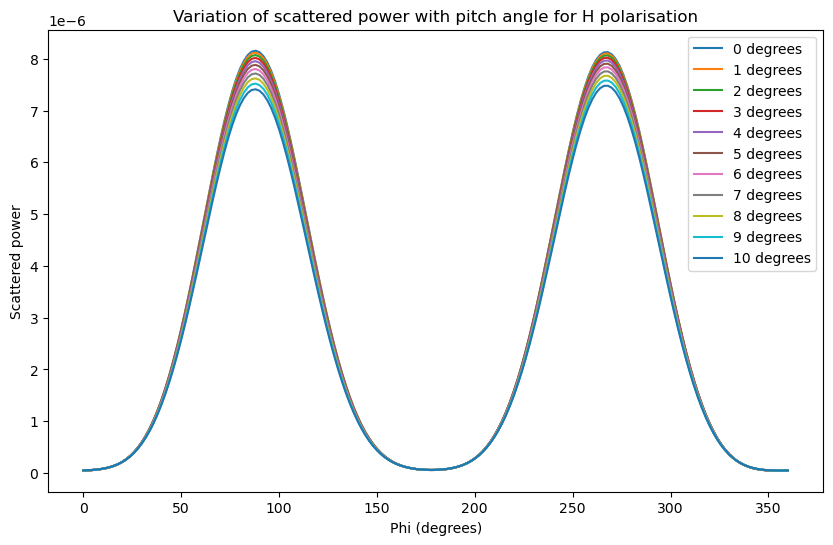

In [42]:
pol = 'H'


for pitch in pitch_list:
    df_bernard = pitch_result_dict[pol][pitch]
    power_bernard_full = get_horizontal_returned_power(df_bernard)

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], power_bernard_full, label=f'{pitch} degrees', linestyle = '-')


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Scattered power')
plt.title(f'Variation of scattered power with pitch angle for {pol} polarisation')

Text(0.5, 1.0, 'Variation of scattered power with pitch angle for V polarisation')

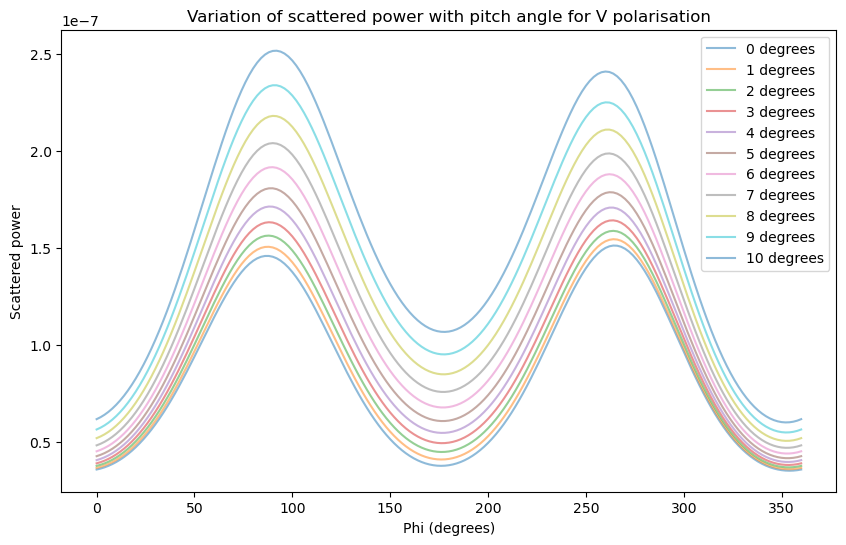

In [43]:
pol = 'V'
frequency = 3 #4.9GHz
scale = '1000'
size = '17mm'

for pitch in pitch_list:
    df_bernard = pitch_result_dict[pol][pitch]
    power_bernard_full = get_vertical_returned_power(df_bernard)

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], power_bernard_full, label=f'{pitch} degrees', linestyle = '-', alpha=0.5)


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Scattered power')
plt.title(f'Variation of scattered power with pitch angle for {pol} polarisation')

Text(0.5, 1.0, 'Variation of differential reflectivity with pitch at 5.6GHz')

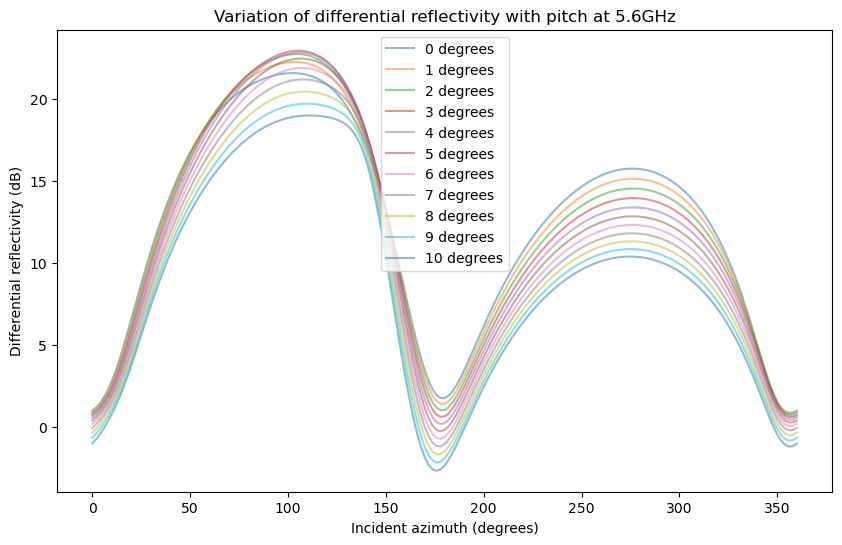

In [44]:
pol = 'H'


for pitch in pitch_list:
    dp = DualPol(pitch_result_dict['H'][pitch], pitch_result_dict['V'][pitch], read_from_df=True)
    dp._calculate_differential_reflectivity()

    plt.plot(df_bernard['phi'], dp.differential_reflectivity, label=f'{pitch} degrees', linestyle = '-', alpha=0.5)


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Incident azimuth (degrees)')
plt.ylabel('Differential reflectivity (dB)')
plt.title(f'Variation of differential reflectivity with pitch at 5.6GHz')

Text(0.5, 1.0, 'Variation of LDR with pitch for H-polarisation')

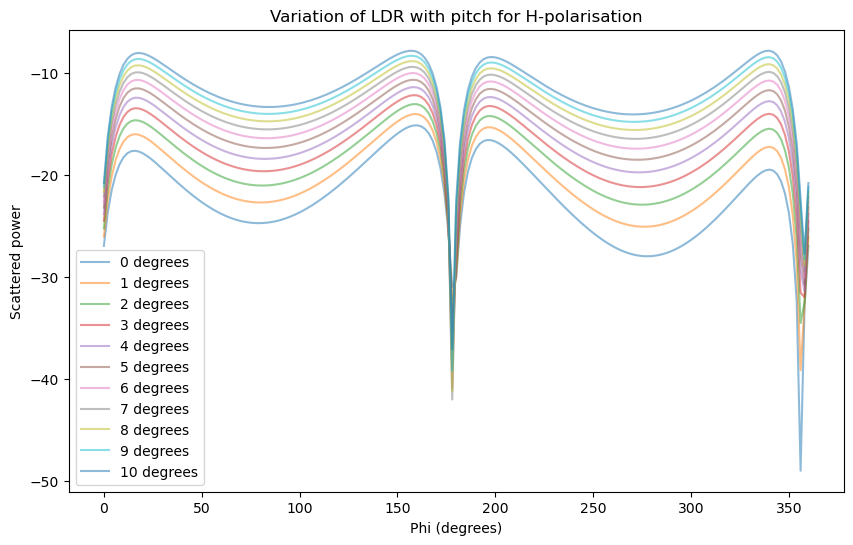

In [45]:
pol = 'H'
frequency = 3 #4.9GHz
scale = '1000'
size = '17mm'

for pitch in pitch_list:
    df_bernard = pitch_result_dict[pol][pitch] 
    ldr = get_linear_depol_ratio(df_bernard)
    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], ldr, label=f'{pitch} degrees', linestyle = '-', alpha=0.5)


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Scattered power')
plt.title(f'Variation of LDR with pitch for {pol}-polarisation')

## Phase with pitch

Text(0.5, 1.0, 'Far field WIPL-D phase in horizontal channel from incident horizontal radiation for Moth at 5.6 GHz')

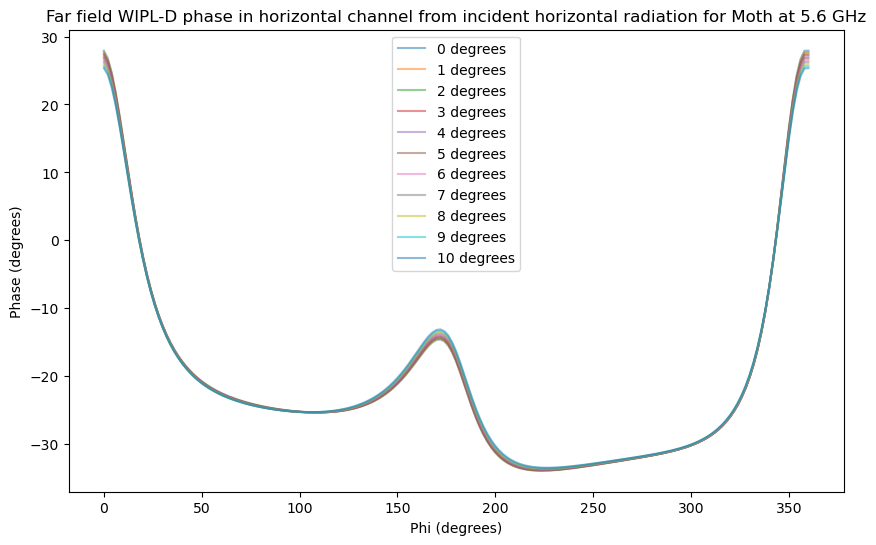

In [46]:
pol = 'H'


for pitch in pitch_list:
    df_bernard = pitch_result_dict[pol][pitch]
    phase = get_horizontal_returned_phase(df_bernard)

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], phase, label=f'{pitch} degrees', linestyle = '-', alpha=0.5)


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Phase (degrees)')
plt.title(f'Far field WIPL-D phase in horizontal channel from incident horizontal radiation for Moth at 5.6 GHz')

Text(0.5, 1.0, 'Far field WIPL-D phase in vertical channel from incident vertical radiation for Moth at 5.6 GHz')

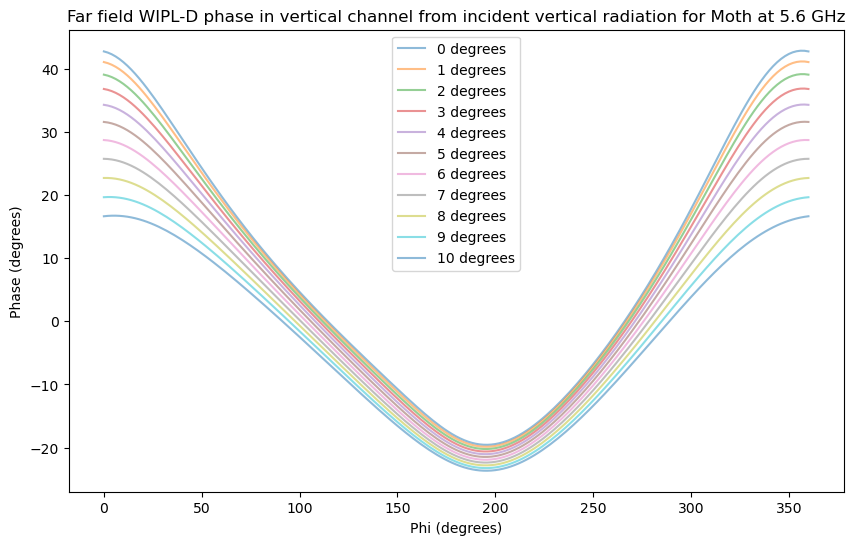

In [47]:
pol = 'V'

for pitch in pitch_list:
    df_bernard = pitch_result_dict[pol][pitch]
    phase = get_vertical_returned_phase(df_bernard)

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], phase, label=f'{pitch} degrees', linestyle = '-', alpha=0.5)


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Phase (degrees)')
plt.title(f'Far field WIPL-D phase in vertical channel from incident vertical radiation for Moth at 5.6 GHz')

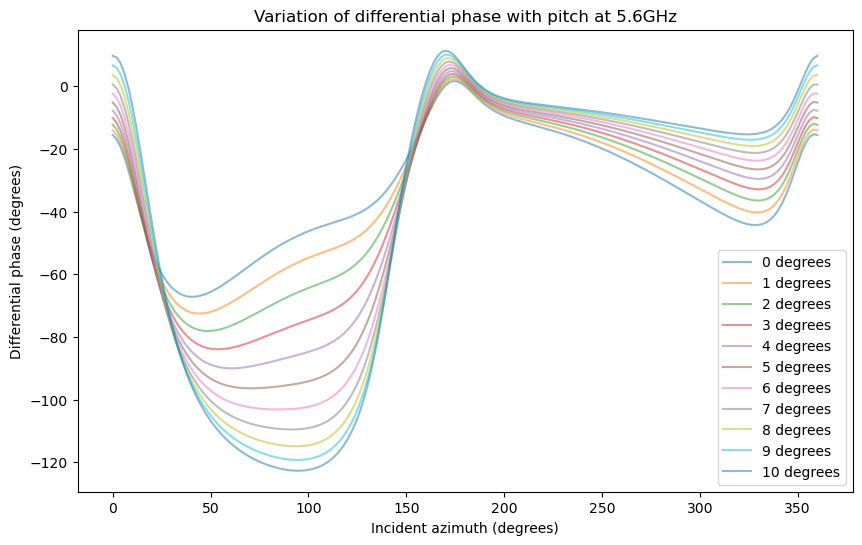

In [48]:
pol = 'H'


for pitch in pitch_list:
    dp = DualPol(pitch_result_dict['H'][pitch], pitch_result_dict['V'][pitch], read_from_df=True)
    dp._calculate_differential_phase()

    plt.plot(df_bernard['phi'], dp.differential_phase, label=f'{pitch} degrees', linestyle = '-', alpha=0.5)


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Incident azimuth (degrees)')
plt.ylabel('Differential phase (degrees)')
plt.title(f'Variation of differential phase with pitch at 5.6GHz')
plt.savefig('./plots/Bernard_phidp_with_pitch.pdf')

# Power with slant

Text(0.5, 1.0, 'Variation of scattered power with slant angle for H polarisation')

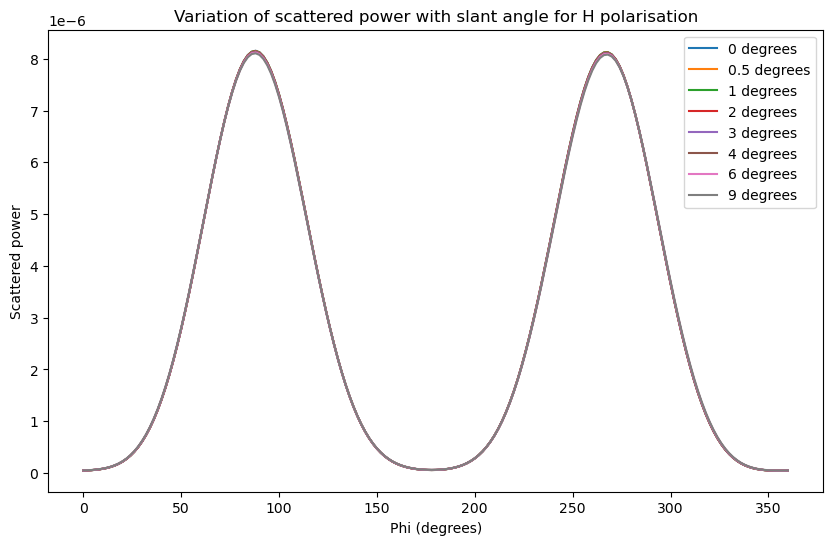

In [49]:
pol = 'H'


for slant in slant_list:
    df_bernard = slant_result_dict[pol][slant]
    power_bernard_full = get_horizontal_returned_power(df_bernard)

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], power_bernard_full, label=f'{slant} degrees', linestyle = '-')


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Scattered power')
plt.title(f'Variation of scattered power with slant angle for {pol} polarisation')

Text(0.5, 1.0, 'Variation of scattered power with slant angle for V polarisation')

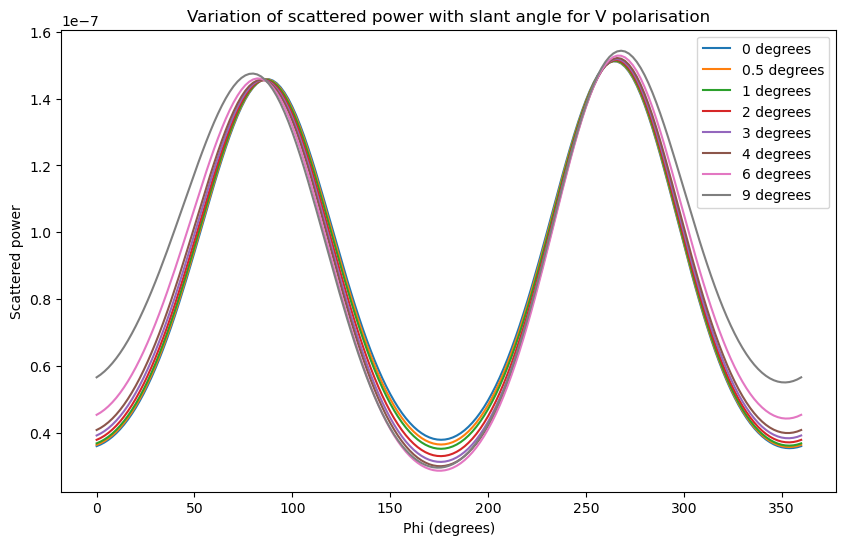

In [50]:
pol = 'V'


for slant in slant_list:
    df_bernard = slant_result_dict[pol][slant]
    power_bernard_full = get_vertical_returned_power(df_bernard)

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], power_bernard_full, label=f'{slant} degrees', linestyle = '-')


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Scattered power')
plt.title(f'Variation of scattered power with slant angle for {pol} polarisation')

Text(0.5, 1.0, 'Variation of differential reflectivity with slant at 5.6GHz')

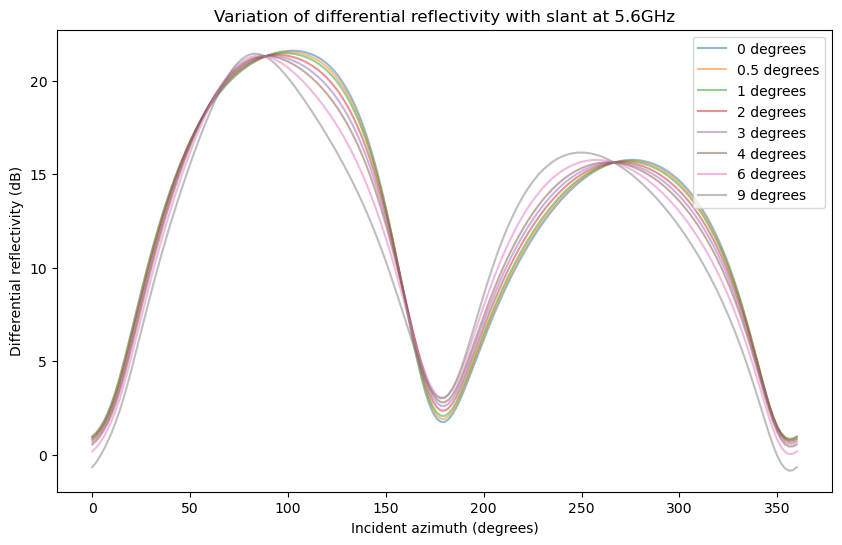

In [51]:



for slant in slant_list:
    dp = DualPol(slant_result_dict['H'][slant], slant_result_dict['V'][slant], read_from_df=True)
    dp._calculate_differential_reflectivity()

    plt.plot(df_bernard['phi'], dp.differential_reflectivity, label=f'{slant} degrees', linestyle = '-', alpha=0.5)


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Incident azimuth (degrees)')
plt.ylabel('Differential reflectivity (dB)')
plt.title(f'Variation of differential reflectivity with slant at 5.6GHz')

Text(0.5, 1.0, 'Variation of LDR with slant for H-polarisation')

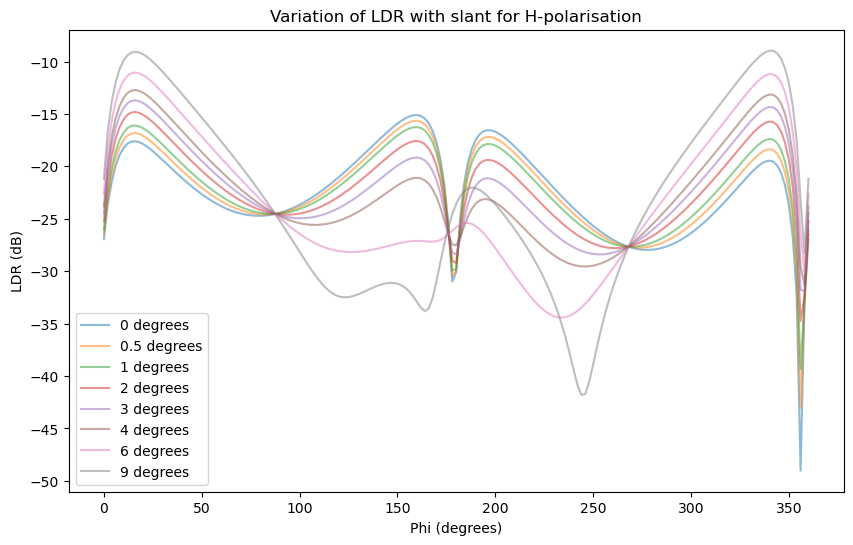

In [52]:
pol = 'H'

for slant in slant_list:
    df_bernard = slant_result_dict[pol][slant] 
    ldr = get_linear_depol_ratio(df_bernard)
    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], ldr, label=f'{slant} degrees', linestyle = '-', alpha=0.5)


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('LDR (dB)')
plt.title(f'Variation of LDR with slant for {pol}-polarisation')

# Phase with slant

Text(0.5, 1.0, 'Far field WIPL-D phase in horizontal channel from incident horizontal radiation for Moth at 5.6 GHz')

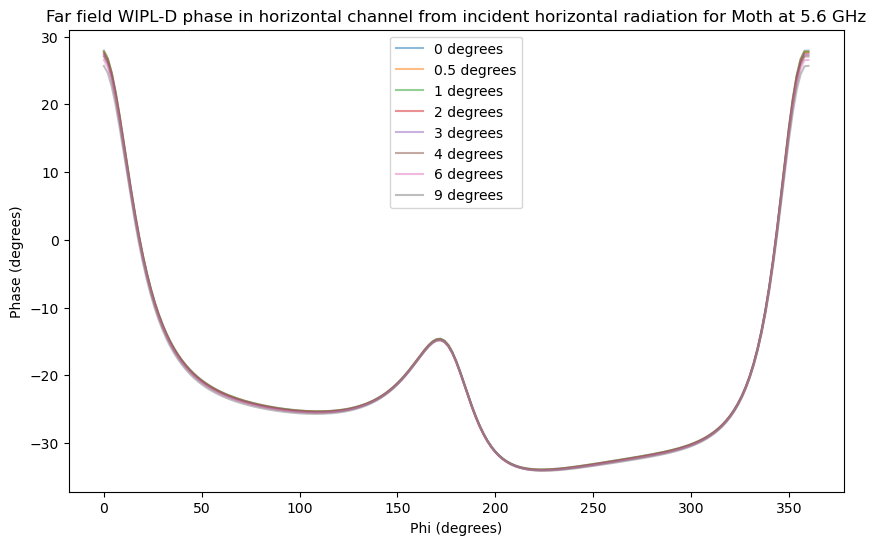

In [53]:
pol = 'H'


for slant in slant_list:
    df_bernard = slant_result_dict[pol][slant]
    phase = get_horizontal_returned_phase(df_bernard)

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], phase, label=f'{slant} degrees', linestyle = '-', alpha=0.5)


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Phase (degrees)')
plt.title(f'Far field WIPL-D phase in horizontal channel from incident horizontal radiation for Moth at 5.6 GHz')

Text(0.5, 1.0, 'Far field WIPL-D phase in vertical channel from incident vertical radiation for Moth at 5.6 GHz')

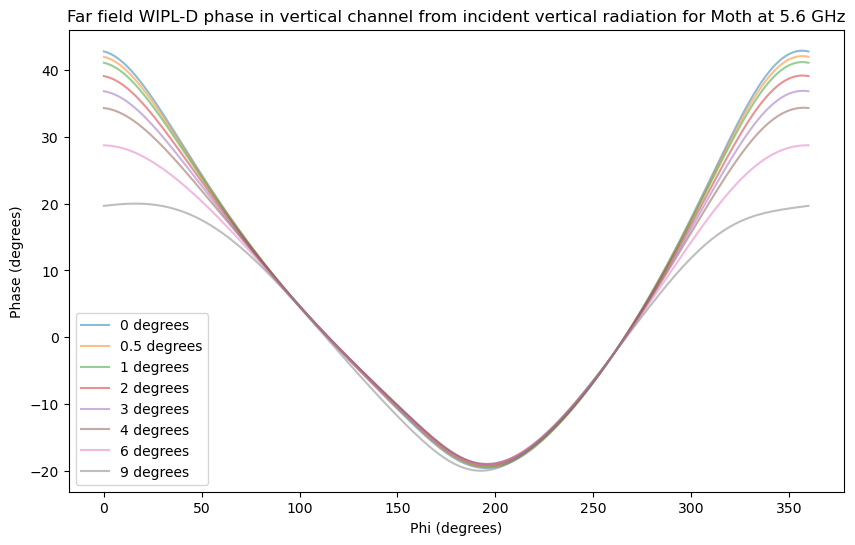

In [54]:
pol = 'V'

for slant in slant_list:
    df_bernard = slant_result_dict[pol][slant]
    phase = get_vertical_returned_phase(df_bernard)

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], phase, label=f'{slant} degrees', linestyle = '-', alpha=0.5)


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Phase (degrees)')
plt.title(f'Far field WIPL-D phase in vertical channel from incident vertical radiation for Moth at 5.6 GHz')

Text(0.5, 1.0, 'Variation of differential phase with slant at 5.6GHz')

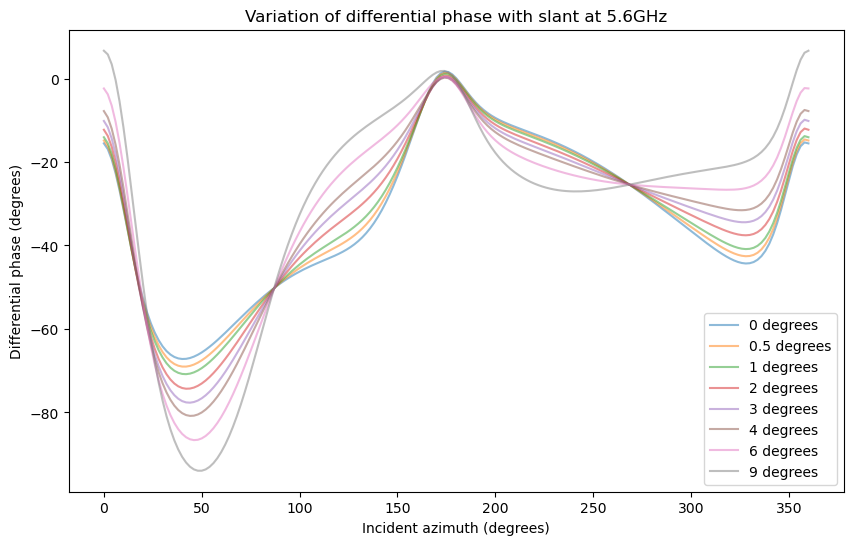

In [55]:
pol = 'H'


for slant in slant_list:
    dp = DualPol(slant_result_dict['H'][slant], slant_result_dict['V'][slant], read_from_df=True)
    dp._calculate_differential_phase()

    plt.plot(df_bernard['phi'], dp.differential_phase, label=f'{slant} degrees', linestyle = '-', alpha=0.5)


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Incident azimuth (degrees)')
plt.ylabel('Differential phase (degrees)')
plt.title(f'Variation of differential phase with slant at 5.6GHz')

## Figure for AMS poster

NameError: name 'phi_T_list' is not defined

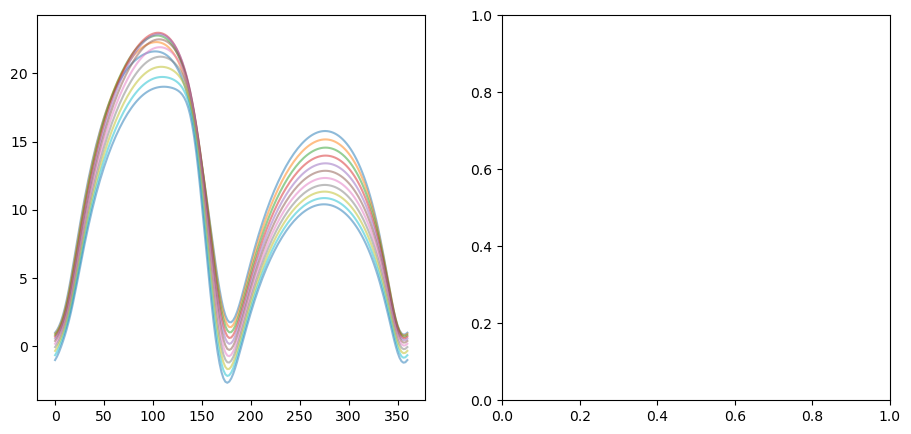

In [56]:
fig, axes = plt.subplots(1,2, figsize=(11,5))

#colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

for pitch in pitch_list:
    dp = DualPol(pitch_result_dict['H'][pitch], pitch_result_dict['V'][pitch], read_from_df=True)
    dp._calculate_differential_reflectivity()

    axes[0].plot(df_bernard['phi'], dp.differential_reflectivity, label=f'{pitch} degrees', linestyle = '-', alpha=0.5)


for counter, phi_T_deg in enumerate(phi_T_list):
    axes[0].plot(H_B['phi'], results_dict['Moth'][phi_T_deg]['Differential reflectivity'], label=f"{phi_T_deg}°")#, color =colors[counter])
    axes[1].plot(H_B['phi'], results_dict['Moth'][phi_T_deg]['Differential Phase'], label=f"{phi_T_deg}°")#, color =colors[counter])

for ax in axes:
    # Draw the vertical line
    ax.axvline(x=180, linestyle='--', color='black')
    
    # Get current y-limits to place text in the middle
    y_min, y_max = ax.get_ylim()
    y_pos = y_max - (y_max - y_min) * 0.1  # 10% below top

    # Add text label near the line
    ax.text(90, y_pos, 'posterior view', rotation=0, va='top', ha='left', color='black')


axes[0].legend()
axes[0].set_ylabel(' Differential Reflectivity (dB)', fontsize =14)
axes[0].set_xlabel('Incident Azimuth (degrees)', fontsize =14)
axes[1].set_xlabel('Incident Azimuth (degrees)', fontsize =14)
axes[1].set_ylabel('Differential Phase (degrees)', fontsize =14)


#fig.suptitle('Sensitivity of the dual-polarisation scattering properties to differential phase on transmission with 10 degree pitch',fontsize=13)

fig.tight_layout()

#fig.savefig('./AMS_poster_plots/phiT_10_pitch.svg')